# Data Viaualization
Used for the final poster

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
replies_df = pd.read_csv('../data/replies.csv')
replies_df.head()

,label,id
0,positive,1223759356631625729
1,negative,1223752255846912000
2,neutral,1223752255846912000
3,negative,1223752255846912000
4,negative,1223752255846912000


In [3]:
raw_df = pd.read_csv('../data/tweets.csv', sep='^([^,]+),', engine='python', usecols=['id', 'tweet'])
raw_df.head()

,id,tweet
0,1223752255846912000,The Fox Corporation (The owners of Fox News) a...
1,1223738389003952128,"Folks, you hear about this cornovirus deal in ..."
2,1223748267609030659,The news is finally out !!!! I will be on @lov...
3,1223739174160928773,Good news! The person under investigation for ...
4,1223737953291128837,"Two avid golfers promised that, whoever died f..."


In [4]:
cleaned_df = pd.read_csv('../data/cleaned_tweets.csv')
cleaned_df.head()

,id,tweet,sentiment,reply_count
0,1223752255846912000,fox corporation owner fox news trying bully ro...,-0.520000,150
1,1223738389003952128,folk hear cornovirus deal news heck doctor rec...,-0.200000,45
2,1223748267609030659,news finally excited journey potential finding...,0.500000,6
3,1223739174160928773,good news person investigation novel coronavir...,-0.250000,12
4,1223737953291128837,two avid golfer promised whoever died first wo...,0.166667,36


In [8]:
import pickle
# tfidf = pickle.load(open('../server/models/tfidf_vectorizer.pkl', 'rb'))
# vector = tfidf.transform(["Reason I believe this is likely is that Correll first tried to work at SpaceX, but we turned him down. Our competitor, it seems, did not."])


In [11]:

tfidf = TfidfVectorizer()
corpus = cleaned_df['tweet'].values.astype(str)
tfidf_matrix = tfidf.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, cleaned_df['sentiment'], test_size=0.2, random_state=42)

In [90]:
model = pickle.load(open('../server/models/xgboost_model.pkl', 'rb'))
mean_squared_error(y_test, model.predict(X_test))
# np.sign(model.predict(X_test))
model.predict(X_test)
# iterate y_test
binary_pred = model.predict(X_test)
binary_sentiment = np.asanyarray([np.sign(y_test.iloc[i]) for i in range(len(y_test))])

# convert zeros to ones
binary_pred[binary_pred == 0] = -1
binary_sentiment[binary_sentiment == 0] = -1




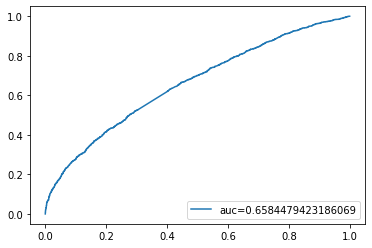

In [91]:


def sigmoid(x):
  return 1 / (1 + np.exp(-x))
soft_pred = sigmoid(model.predict(X_test))
fpr, tpr, _ = roc_curve(binary_sentiment, soft_pred)
auc = roc_auc_score(binary_sentiment, binary_pred)
plt.plot(fpr,tpr,label=f"auc={auc}")
plt.legend(loc=4)
plt.show()


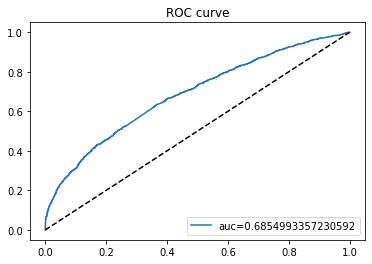

In [109]:
binary_pred = model.predict(X_test)
binary_sentiment = np.asanyarray([np.sign(y_test.iloc[i]) for i in range(len(y_test))])

# index of zeros in test set
zero_indices = set(np.where(binary_sentiment == 0)[0])

binary_pred_no_zero = []
binary_sentiment_no_zero = []

for i in range(len(binary_pred)):
  if i in zero_indices:
    continue
  binary_pred_no_zero.append(binary_pred[i])
  binary_sentiment_no_zero.append(binary_sentiment[i])
binary_pred_no_zero = np.asanyarray(binary_pred_no_zero)
binary_sentiment_no_zero = np.asanyarray(binary_sentiment_no_zero)

binary_sentiment_no_zero = (binary_sentiment_no_zero + 1) // 2

soft_pred_no_zero = sigmoid(binary_pred_no_zero)
fpr, tpr, _ = roc_curve(binary_sentiment_no_zero, soft_pred_no_zero)
auc = roc_auc_score(binary_sentiment_no_zero, binary_pred_no_zero)
plt.plot(fpr,tpr,label=f"auc={auc}")
# plot 45 degree line
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)

plt.title('ROC curve')
plt.show()